# Pakistan E-commerce Dataset - Data Cleaning
## Final Optimized Version

### Steps:
1. Load Data
2. Remove Empty Columns & Rows
3. Remove Duplicates
4. Convert Data Types
5. Clean Text Data
6. Handle Outliers
7. Save Clean Data

## 1. Import Libraries & Load Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv("data/Pakistan Largest Ecommerce Dataset.csv", low_memory=False)

print(f"Original shape: {df.shape}")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

Original shape: (1048575, 26)
Total records: 1,048,575
Total columns: 26


## 2. Initial Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [3]:
# Check missing values
print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Missing percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values:
item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

Missing percentage:
item_id                   44.26
status                    44.26
created_at                44

In [4]:
# Statistical summary
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


## 3. Remove Empty Columns

In [23]:
# Identify and remove completely empty columns
empty_cols = [col for col in df.columns if df[col].isnull().sum() == len(df)]

print(f"Empty columns found: {len(empty_cols)}")
print(f"Columns: {empty_cols}")

df = df.drop(columns=empty_cols)

print(f"\nShape after removing empty columns: {df.shape}")

Empty columns found: 5
Columns: ['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']

Shape after removing empty columns: (1048575, 21)


## 4. Remove Duplicates

In [24]:
original_rows = len(df)
duplicates = df.duplicated().sum()

print(f"Total rows: {original_rows:,}")
print(f"Duplicates found: {duplicates:,} ({duplicates/original_rows*100:.2f}%)")

df = df.drop_duplicates()

rows_after = len(df)
rows_removed = original_rows - rows_after

print(f"\nShape after removing duplicates: {df.shape}")
print(f"Rows removed: {rows_removed:,}")

Total rows: 1,048,575
Duplicates found: 464,050 (44.26%)

Shape after removing duplicates: (584525, 21)
Rows removed: 464,050


## 5. Convert Data Types

In [25]:
# Convert date columns
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['Working Date'] = pd.to_datetime(df['Working Date'], errors='coerce')
df['Customer Since'] = pd.to_datetime(df['Customer Since'], errors='coerce')
df['M-Y'] = pd.to_datetime(df['M-Y'], errors='coerce')

print("Date columns converted successfully")
print("\nData types:")
print(df.dtypes)

Date columns converted successfully

Data types:
item_id                         float64
status                           object
created_at               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date             datetime64[ns]
BI Status                        object
 MV                              object
Year                            float64
Month                           float64
Customer Since           datetime64[ns]
M-Y                      datetime64[ns]
FY                               object
Customer ID                     float64
dtype: object


C:\Users\FCC\AppData\Local\Temp\ipykernel_14932\209816626.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['M-Y'] = pd.to_datetime(df['M-Y'], errors='coerce')


## 6. Clean Column Names

In [26]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Column names cleaned:")
print(df.columns.tolist())

Column names cleaned:
['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'category_name_1', 'sales_commission_code', 'discount_amount', 'payment_method', 'working_date', 'bi_status', 'mv', 'year', 'month', 'customer_since', 'm-y', 'fy', 'customer_id']


## 7. Clean Text Data
### 7.1 Clean Status Column

In [27]:
print("Status values before:")
print(df['status'].value_counts())

df['status'] = df['status'].str.strip().str.lower()
df['status'] = df['status'].replace({
    'refund': 'order_refunded',
    'pending_paypal': 'pending',
    'cod': 'complete',
    'paid': 'complete',
    'closed': 'complete',
    'processing': 'pending',
    'holded': 'pending',
    'exchange': 'order_refunded',
    '\\n': 'unknown'
})

print("\nStatus values after:")
print(df['status'].value_counts())

Status values before:
status
complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: count, dtype: int64

Status values after:
status
complete          238197
canceled          201249
received           77290
order_refunded     67583
pending              119
payment_review        57
fraud                 10
unknown                4
Name: count, dtype: int64


### 7.2 Clean Payment Method

In [28]:
print("Payment methods before:")
print(df['payment_method'].value_counts())

df['payment_method'] = df['payment_method'].str.strip().str.lower()
df['payment_method'] = df['payment_method'].replace({
    'cashatdoorstep': 'cod',
    'easypay_ma': 'easypay',
    'easypay_voucher': 'easypay',
    'jazzvoucher': 'jazzwallet',
    'bankalfalah': 'bank_payment',
    'ublcreditcard': 'bank_payment',
    'internetbanking': 'bank_payment',
    'mygateway': 'bank_payment'
})

print("\nPayment methods after:")
print(df['payment_method'].value_counts())

Payment methods before:
payment_method
cod                  271960
Payaxis               97641
Easypay               82900
jazzwallet            35145
easypay_voucher       31176
bankalfalah           23065
jazzvoucher           15633
Easypay_MA            14028
customercredit         7555
apg                    1758
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: count, dtype: int64

Payment methods after:
payment_method
cod                  272692
easypay              128104
payaxis               97641
jazzwallet            50778
bank_payment          25088
customercredit         7555
apg                    1758
mcblite                 723
productcredit           125
marketingexpense         45
financesettlement        15
Name: count, dtype: int64


### 7.3 Clean Category

In [29]:
print("Categories before:")
print(df['category_name_1'].value_counts())

df['category_name_1'] = df['category_name_1'].str.strip().str.lower()
df['category_name_1'] = df['category_name_1'].replace({
    '\\n': 'unknown',
    'others': 'unknown'
})

print("\nCategories after:")
print(df['category_name_1'].value_counts())

Categories before:
category_name_1
Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: count, dtype: int64

Categories after:
category_name_1
mobiles & tablets     115710
men's fashion          92221
women's fashion        59721
appliances             52413
superstore             43613
beauty & grooming      41496
unknown                37068
soghaat                34011
home & living          26504
entertainment          26326
health & sports        17502
kids & baby            16494
computing              15933
school & education      3478
books                   1870
Name:

### 7.4 Clean Other Text Columns

In [30]:
df['sku'] = df['sku'].str.strip().str.lower()
df['sales_commission_code'] = df['sales_commission_code'].str.strip().str.lower()
df['sales_commission_code'] = df['sales_commission_code'].replace('\\n', 'unknown')
df['bi_status'] = df['bi_status'].str.strip().str.lower()

print("All text columns cleaned")

All text columns cleaned


## 8. Handle Negative Values

In [31]:
print(f"Rows before: {len(df):,}")
print(f"Negative grand_total: {(df['grand_total'] < 0).sum()}")
print(f"Negative discount: {(df['discount_amount'] < 0).sum()}")

df = df[df['grand_total'] >= 0]
df = df[df['discount_amount'] >= 0]

print(f"\nRows after: {len(df):,}")
print(f"Negative values removed")

Rows before: 584,525
Negative grand_total: 76
Negative discount: 3

Rows after: 584,445
Negative values removed


## 9. Handle Zero Prices

In [32]:
rows_before = len(df)
zero_prices = (df['price'] == 0).sum()

print(f"Rows before: {rows_before:,}")
print(f"Zero prices found: {zero_prices}")

# Remove zero prices
df = df[df['price'] > 0]

rows_after = len(df)
print(f"\nRows after: {rows_after:,}")
print(f"Rows removed: {rows_before - rows_after}")

Rows before: 584,445
Zero prices found: 2232

Rows after: 582,213
Rows removed: 2232


## 10. Remove Outliers (Using 99th Percentile)

In [33]:
rows_before = len(df)
print(f"Rows before: {rows_before:,}")
print(f"\nPrice statistics before:")
print(df['price'].describe())

# Using 99th percentile (better than IQR)
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)

df = df[(df['price'] >= lower) & (df['price'] <= upper)]

rows_after = len(df)
outliers_removed = rows_before - rows_after

print(f"\nRows after: {rows_after:,}")
print(f"Outliers removed: {outliers_removed:,} ({outliers_removed/rows_before*100:.2f}%)")
print(f"\nPrice range: [{lower:.2f}, {upper:.2f}]")
print(f"\nPrice statistics after:")
print(df['price'].describe())

Rows before: 582,213

Price statistics before:
count    5.822130e+05
mean     6.373544e+03
std      1.497342e+04
min      1.000000e-01
25%      3.630000e+02
50%      9.000000e+02
75%      4.164000e+03
max      1.012626e+06
Name: price, dtype: float64

Rows after: 570,912
Outliers removed: 11,301 (1.94%)

Price range: [27.00, 83770.00]

Price statistics after:
count    570912.000000
mean       5487.139715
std       11361.952205
min          27.000000
25%         370.000000
50%         900.000000
75%        4000.000000
max       83770.000000
Name: price, dtype: float64


## 11. Visualize After Cleaning

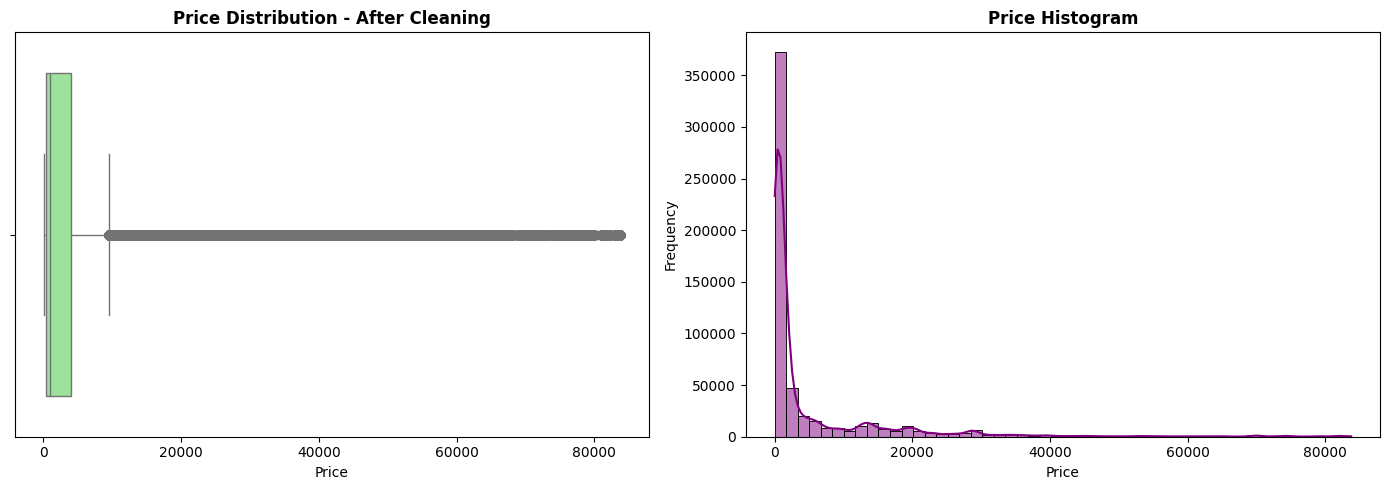

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
sns.boxplot(x=df['price'], color='lightgreen', ax=axes[0])
axes[0].set_title('Price Distribution - After Cleaning', fontweight='bold')
axes[0].set_xlabel('Price')

# Histogram
sns.histplot(df['price'], bins=50, kde=True, color='purple', ax=axes[1])
axes[1].set_title('Price Histogram', fontweight='bold')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 12. Fill Missing Values

In [35]:
print(f"Missing values before:")
print(df.isnull().sum()[df.isnull().sum() > 0])

df['status'] = df['status'].fillna('unknown')
df['sku'] = df['sku'].fillna('unknown')
df['category_name_1'] = df['category_name_1'].fillna('unknown')
df['sales_commission_code'] = df['sales_commission_code'].fillna('unknown')

# Remove rows with missing customer data
df = df.dropna(subset=['customer_id', 'customer_since'])

print(f"\nMissing values after:")
missing_after = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_after) == 0:
    print("No missing values remaining!")
else:
    print(missing_after)

Missing values before:
status                       14
sku                           3
category_name_1             164
sales_commission_code    131829
customer_since               11
customer_id                  11
dtype: int64

Missing values after:
No missing values remaining!


## 13. Final Report

In [36]:
print("="*60)
print("FINAL CLEANING REPORT")
print("="*60)
print(f"Final rows: {len(df):,}")
print(f"Final columns: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Negative grand_total: {(df['grand_total'] < 0).sum()}")
print(f"Negative discount: {(df['discount_amount'] < 0).sum()}")
print(f"Zero prices: {(df['price'] == 0).sum()}")
print(f"\nDataset Reduction:")
print(f"Original: 1,048,575 rows")
print(f"Final: {len(df):,} rows")
print(f"Removed: {1048575 - len(df):,} rows ({(1048575-len(df))/1048575*100:.2f}%)")
print("="*60)

FINAL CLEANING REPORT
Final rows: 570,901
Final columns: 21
Missing values: 0
Duplicates: 0
Negative grand_total: 0
Negative discount: 0
Zero prices: 0

Dataset Reduction:
Original: 1,048,575 rows
Final: 570,901 rows
Removed: 477,674 rows (45.55%)


## 14. Additional Statistics

In [37]:
print("Status distribution:")
print(df['status'].value_counts())
print("\n" + "="*50)

print("\nPayment method distribution:")
print(df['payment_method'].value_counts())
print("\n" + "="*50)

print("\nTop 10 categories:")
print(df['category_name_1'].value_counts().head(10))

Status distribution:
status
complete          236252
canceled          193919
received           75779
order_refunded     64763
pending              108
payment_review        57
unknown               16
fraud                  7
Name: count, dtype: int64


Payment method distribution:
payment_method
cod                  267572
easypay              125669
payaxis               95454
jazzwallet            49587
bank_payment          22863
customercredit         7186
apg                    1698
mcblite                 703
productcredit           111
marketingexpense         45
financesettlement        13
Name: count, dtype: int64


Top 10 categories:
category_name_1
mobiles & tablets    110326
men's fashion         91786
women's fashion       59457
appliances            52173
superstore            41547
beauty & grooming     41328
unknown               34038
soghaat               33831
home & living         26273
entertainment         26079
Name: count, dtype: int64


## 15. Save Clean Data

In [39]:
df.to_csv('data/cleaned_final_data.csv', index=False)
print("Clean data saved: data/cleaned_final_data.csv")

Clean data saved: data/cleaned_final_data.csv
